# Libraries
We import the required libraries for the whole project

In [ ]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.utils import to_categorical 
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Dataset
Upload the dataset and see how it looks like.

In [ ]:
def load_fashion_mnist():
    
    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784)
                                                                                       
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test

In [ ]:
X_train, Y_train, X_test, Y_test = load_fashion_mnist()
print("The shape of the matrices:")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

The shape of the matrices:
(60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
# We create a validation set to compare our models

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15,random_state=123)

print("The shape of the new matrices:")
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

The shape of the new matrices:
(51000, 784) (51000,) (9000, 784) (9000,) (10000, 784) (10000,)


In [ ]:
# The dataset contains the followung 10 classes:

classes = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
           3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
           7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

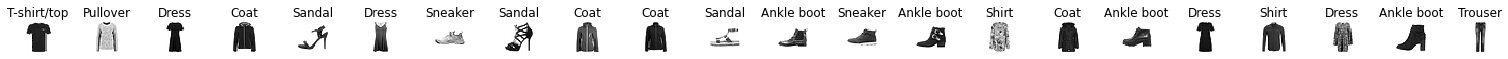

In [ ]:
# Let's take a look at the various classes

plt.figure(figsize=(65,20))
for idx in range(31,53):
  plt.subplot(31,53,idx+1)
  img = X_train[idx].reshape(28,28)
  plt.title(f'{classes[Y_train[idx]]}')
  plt.imshow(img,cmap=plt.cm.gray_r, interpolation="nearest")
  plt.axis('off')

Number of elements for each class:
[5096, 5138, 5107, 5126, 5071, 5076, 5138, 5100, 5098, 5050]


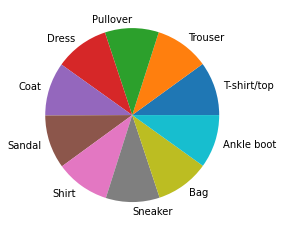

In [ ]:
# Are the data balanced?

Y=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  Y[i]=(Y_train==i).sum()
print(f"Number of elements for each class:\n{Y}")

# Pie chart of class frequency

class_fr = np.array(Y)
frequency = class_fr/class_fr.sum()
plt.pie(frequency, labels=list(classes.values()))
plt.show()

In [ ]:
# Do we need to rescale?

m=np.linalg.norm(X_train[0,:])
M=0
for i in X_train:
  norm = np.linalg.norm(i)
  if m>norm:
    m = norm
  if M<norm:
    M=norm
print(f"The smallest norm: {m}")
print(f"The biggest norm: {M}") 

The smallest norm: 548.9098286604094
The biggest norm: 5839.711551095653


In [ ]:
# We transform the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)


In [ ]:
# Does the standard transformation work?

m=np.linalg.norm(X_train_std[0,:])
M=0
for i in X_train_std:
  norm = np.linalg.norm(i)
  if m>norm:
    m = norm
  if M<norm:
    M=norm

print(f"The new smallest norm: {m}")
print(f"The new biggest norm: {M}") 


The new smallest norm: 12.549893891593527
The new biggest norm: 230.7549390042954


# Comparison of different models



1. SVM
2. RANDOM FOREST
3. K-NN
4. NEURAL NETWORK 








In [ ]:
# SVM 

grid_param_svm = {"C":[0.1,1,10]}

model_svm = svm.SVC(random_state=123)
model_svm = GridSearchCV(model_svm,grid_param_svm, n_jobs= -1, cv =3, scoring = "accuracy",return_train_score=True)
model_svm.fit(X_train_std,Y_train)

# We build a df where the columns are the set, the rows are the hp and the entries are the score (acc)
L=[]
for i in model_svm.cv_results_["params"]:
    c= tuple(zip(i.keys(),i.values()))
    L.append(c)
D={"Train":dict(zip(L,model_svm.cv_results_["mean_train_score"])),"Validation":dict(zip(L,model_svm.cv_results_["mean_test_score"]))}
df_score_svm = pd.DataFrame(D)
df_score_svm

,Train,Validation
"(C, 0.1)",0.847922,0.839471
"(C, 1)",0.920275,0.886314
"(C, 10)",0.984725,0.897314


In [ ]:
# RANDOM FOREST

grid_params_rf = {
    'n_estimators': (5, 10, 50, 80),
    'criterion':["entropy"],
    'max_depth': (None, 3, 5, 10),
}

model = RandomForestClassifier(random_state= 123)
model_rf = GridSearchCV(model, grid_params_rf, n_jobs= -1, cv = 3,scoring = "accuracy",verbose = 3,return_train_score=True)
model_rf.fit(X_train_std, Y_train)

# We build a df where the columns are the set, the rows are the hp and the entries are the score (acc)
L1=[]
for i in model_rf.cv_results_["params"]:
    c= tuple(zip(i.keys(),i.values()))
    L1.append(c)
D1={"Train":dict(zip(L1,model_rf.cv_results_["mean_train_score"])),"Validation":dict(zip(L1,model_rf.cv_results_["mean_test_score"]))}
df_score_rf = pd.DataFrame(D1)
df_score_rf

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Train  Validation
(criterion, entropy) (max_depth, None) (n_estimators, 5)   0.983010    0.836000
                                       (n_estimators, 10)  0.994686    0.854882
                                       (n_estimators, 50)  0.999961    0.875510
                                       (n_estimators, 80)  1.000000    0.877706
                     (max_depth, 3)    (n_estimators, 5)   0.610961    0.609412
                                       (n_estimators, 10)  0.637510    0.636353
                                       (n_estimators, 50)  0.671882    0.670098
                                       (n_estimators, 80)  0.674373    0.671980
                     (max_depth, 5)    (n_estimators, 5)   0.754608    0.749667
                                       (n_estimators, 10)  0.766196    0.760824
                                       (n_estimators, 50)  0.769863    0.765824
                                       (n_estimators, 80)  0.771529    0.767824
                     (max_depth, 10)   (n_estimators, 5)   0.872225    0.832588
                                       (n_estimators, 10)  0.883373    0.842431
                                       (n_estimators, 50)  0.893696    0.852627
                                       (n_estimators, 80)  0.894990    0.853294

In [ ]:
# K-NN

grid_params_knn = {'n_neighbors': [2,6,9,15]}

model_knn = KNeighborsClassifier()
model_knn = GridSearchCV(model_knn, grid_params_knn, n_jobs= -1, cv = 3,scoring = "accuracy",verbose = 3,return_train_score=True)
model_knn.fit(X_train_std, Y_train)

# We build a df where the columns are the set, the rows are the hp and the entries are the score (acc)
L2=[]
for i in model_knn.cv_results_["params"]:
    c= tuple(zip(i.keys(),i.values()))
    L2.append(c)
D2={"Train":dict(zip(L2,model_knn.cv_results_["mean_train_score"])),"Validation":dict(zip(L2,model_knn.cv_results_["mean_test_score"]))}
df_score_knn = pd.DataFrame(D2)
df_score_knn

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,Train,Validation
"(n_neighbors, 2)",0.926422,0.836961
"(n_neighbors, 6)",0.888284,0.848804
"(n_neighbors, 9)",0.873480,0.846314
"(n_neighbors, 15)",0.860284,0.842490


In [ ]:
# NEURAL NETWORK

# Build categorical variable
feature_vector_length = X_train.shape[1]
num_classes = 10


Y_train_cat = to_categorical(Y_train, num_classes)
Y_val_cat = to_categorical(Y_val, num_classes)


In [ ]:
# Set-up an early stopping 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   patience = 13, 
                   verbose=1)

In [ ]:
# Set-up a function to define a Neural Network to do a little grid search on number of layer
def NN_grid(n_layers,n_unit):
    # seed
    np.random.seed(42)
    set_random_seed(3)
    
    # define a sequential model
    model = Sequential()

    # define the first layer 
    for i in range(n_layers):
        if i == 1: 
            model.add(Dense(units = n_unit, input_dim = feature_vector_length, activation='relu'))
        else:
            model.add(Dense(units = n_unit, activation = 'relu'))

    model.add(Dense(units = num_classes, activation= 'softmax'))


    # Configure the model and start training
    model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',  
              metrics=['accuracy']) 

    return model

In [ ]:
# Let's build 12 neural network with respectively 2,4,8 layers and 15,50,100,300 units and train them on standard rescale
history_list=[]
model_list =[]
for i in [2,4,8]:
  for j in [15,50,100,300]:
      x=NN_grid(i,j)
      model_list.append(x)
      print(f"\n Neural Network with {i} layers and {j} unit per hidden layer:\n")
      history= x.fit(X_train_std, Y_train_cat, epochs=500, batch_size=16, verbose=1, validation_split=0.1,callbacks=[es])
      history_list.append(history)


 Neural Network with 2 layers and 15 unit per hidden layer:

Epoch 1/500
2869/2869 [==============================] - 6s 2ms/step - loss: 0.6120 - accuracy: 0.7801 - val_loss: 0.4587 - val_accuracy: 0.8378
Epoch 2/500
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4251 - accuracy: 0.8476 - val_loss: 0.4269 - val_accuracy: 0.8502
Epoch 3/500
2869/2869 [==============================] - 5s 2ms/step - loss: 0.3908 - accuracy: 0.8581 - val_loss: 0.3997 - val_accuracy: 0.8604
Epoch 4/500
2869/2869 [==============================] - 5s 2ms/step - loss: 0.3708 - accuracy: 0.8657 - val_loss: 0.4018 - val_accuracy: 0.8555
Epoch 5/500
2869/2869 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.8708 - val_loss: 0.3844 - val_accuracy: 0.8625
Epoch 6/500
2869/2869 [==============================] - 5s 2ms/step - loss: 0.3454 - accuracy: 0.8746 - val_loss: 0.3914 - val_accuracy: 0.8606
Epoch 7/500
2869/2869 [==============================] - 4s 2ms/step



 Accuracy and loss plots for NN with 2 layers 



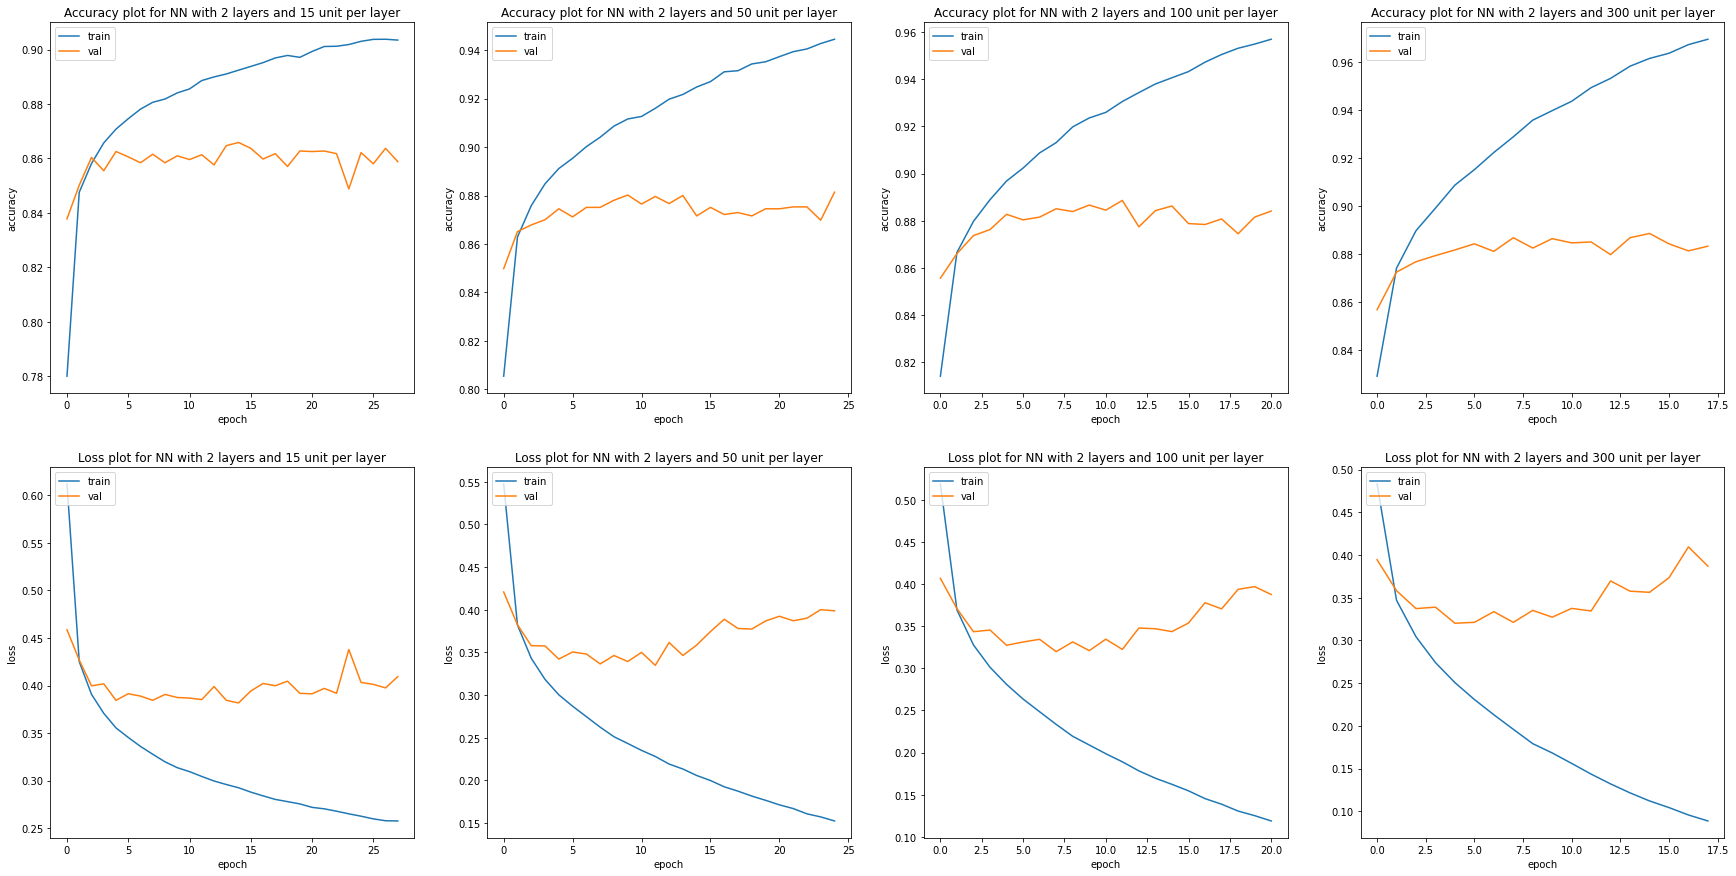



 Accuracy and loss plots for NN with 4 layers 



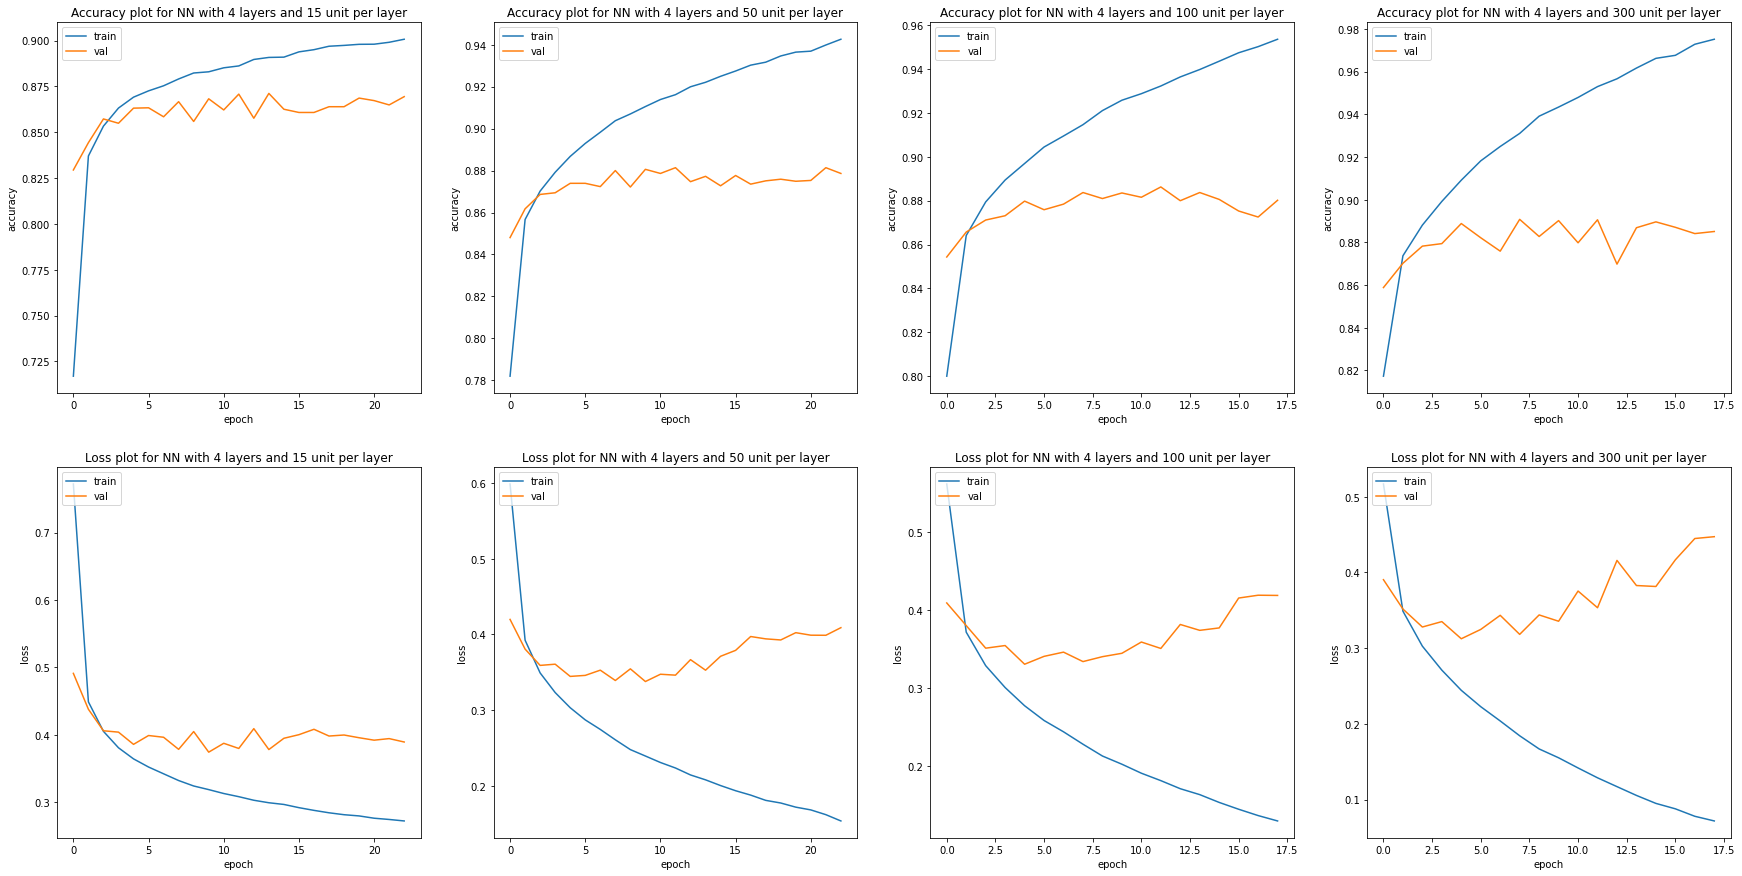



 Accuracy and loss plots for NN with 8 layers 



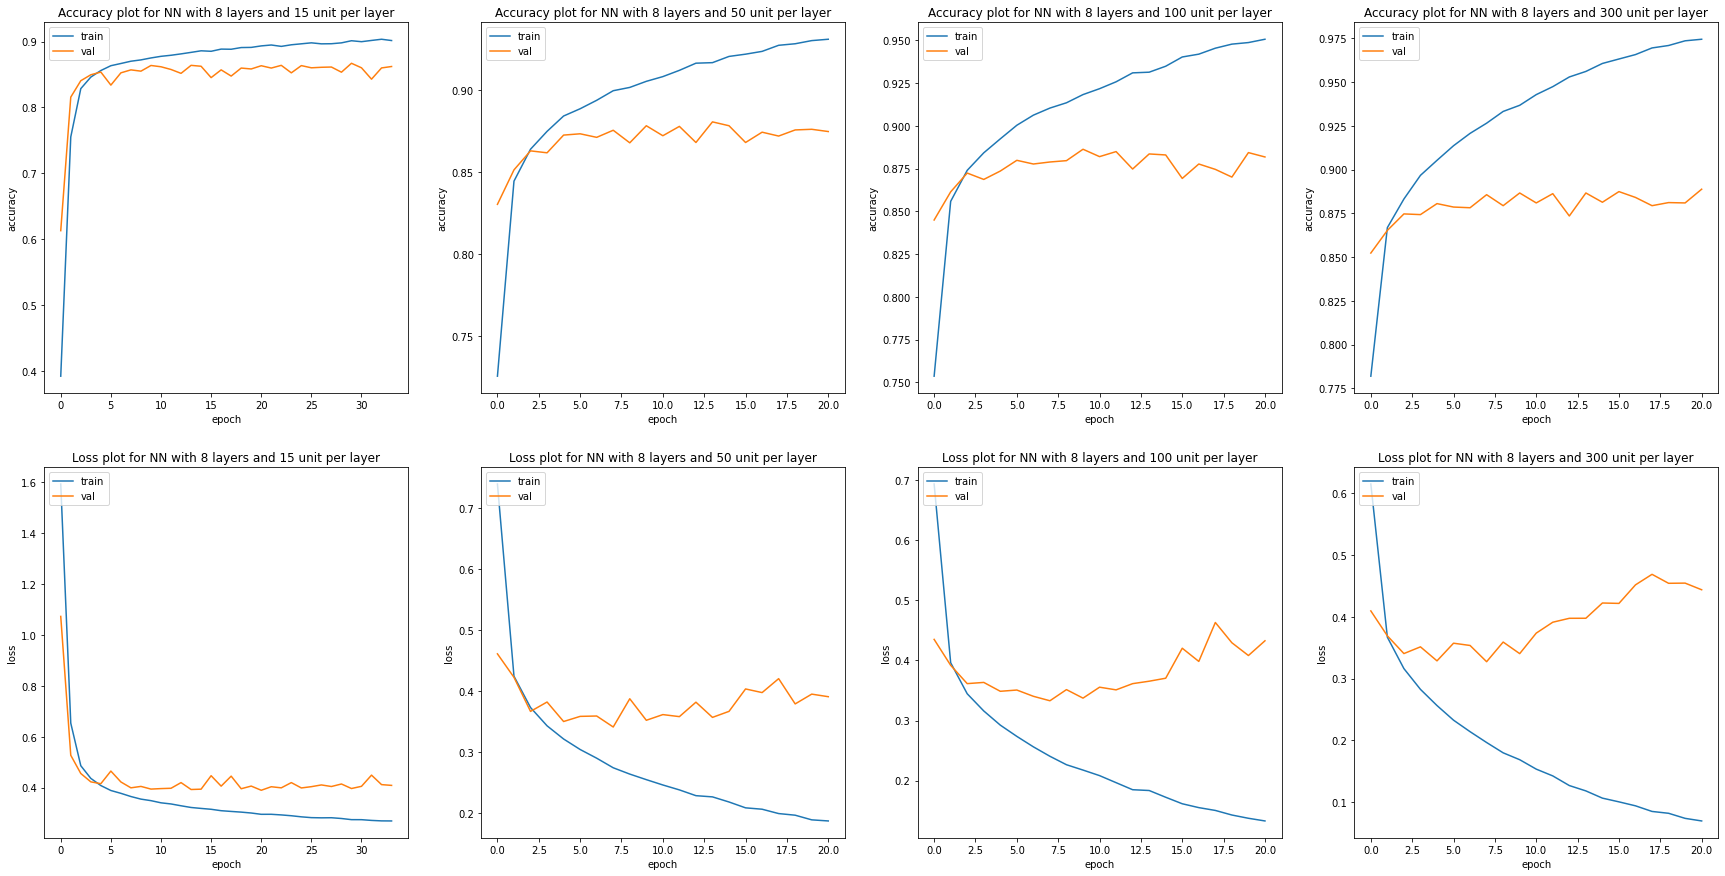

In [ ]:
l=0
for i in [2,4,8]:
  fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,15))
  print(f"\n\n Accuracy and loss plots for NN with {i} layers \n")
  for j in [15,50,100,300]:
    axes[0,l%4].plot(history_list[l].history['accuracy'])
    axes[0,l%4].plot(history_list[l].history['val_accuracy'])
    axes[0,l%4].set_title(f'Accuracy plot for NN with {i} layers and {j} unit per layer')
    axes[0,l%4].set_ylabel('accuracy')
    axes[0,l%4].set_xlabel('epoch')
    axes[0,l%4].legend(['train', 'val'], loc='upper left')
    

    axes[1,l%4].plot(history_list[l].history['loss'])
    axes[1,l%4].plot(history_list[l].history['val_loss'])
    axes[1,l%4].set_title(f'Loss plot for NN with {i} layers and {j} unit per layer')
    axes[1,l%4].set_ylabel('loss')
    axes[1,l%4].set_xlabel('epoch')
    axes[1,l%4].legend(['train', 'val'], loc='upper left')

    l+=1
  plt.show()

Let's find the best model!!!!

In [ ]:
# SVM
Y_train_pred_svm = model_svm.predict(X_train_std)
Y_val_pred_svm = model_svm.predict(X_val_std)

svm_acc_train = accuracy_score(Y_train_pred_svm,Y_train)
svm_acc_val = accuracy_score(Y_val_pred_svm,Y_val)
svm_f1_train = f1_score(Y_train_pred_svm,Y_train, average='macro')
svm_f1_val = f1_score(Y_val_pred_svm,Y_val, average='macro')



# RANDOM FOREST
Y_train_pred_rf = model_rf.predict(X_train_std)
Y_val_pred_rf = model_rf.predict(X_val_std)

rf_acc_train = accuracy_score(Y_train_pred_rf,Y_train)
rf_acc_val = accuracy_score(Y_val_pred_rf,Y_val)
rf_f1_train = f1_score(Y_train_pred_rf,Y_train, average='macro')
rf_f1_val = f1_score(Y_val_pred_rf,Y_val, average='macro')



# K-NN
Y_train_pred_knn = model_knn.predict(X_train_std)
Y_val_pred_knn = model_knn.predict(X_val_std)

knn_acc_train = accuracy_score(Y_train_pred_knn,Y_train)
knn_acc_val = accuracy_score(Y_val_pred_knn,Y_val)
knn_f1_train = f1_score(Y_train_pred_knn,Y_train, average='macro')
knn_f1_val = f1_score(Y_val_pred_knn,Y_val, average='macro')





# NEURAL NETWORK
Y_train_pred_nn = model_list[-1].predict(X_train_std).argmax(axis = 1) 
Y_val_pred_nn = model_list[-1].predict(X_val_std).argmax(axis = 1)

nn_acc_train = accuracy_score(Y_train_pred_nn,Y_train)
nn_acc_val = accuracy_score(Y_val_pred_nn,Y_val)
nn_f1_train = f1_score(Y_train_pred_nn,Y_train, average='macro')
nn_f1_val = f1_score(Y_val_pred_nn,Y_val, average='macro')

In [ ]:
#Plot the result
Acc_train = pd.Series({"SVM":svm_acc_train, "Random Forest":rf_acc_train,"K-NN":knn_acc_train, "NN":nn_acc_train})
Acc_validation = pd.Series({"SVM":svm_acc_val, "Random Forest":rf_acc_val,"K-NN":knn_acc_val, "NN":nn_acc_val})
F1_train = pd.Series({"SVM":svm_f1_train, "Random Forest":rf_f1_train,"K-NN":knn_f1_train, "NN":nn_f1_train})
F1_val = pd.Series({"SVM":svm_f1_val, "Random Forest":rf_f1_val,"K-NN":knn_f1_val, "NN":nn_f1_val})


Val_train_score_df = pd.DataFrame({"Accuracy train":Acc_train, "Accuracy validation":Acc_validation, "F1 score train":F1_train, "F1 score validation":F1_val})
Val_train_score_df

,Accuracy train,Accuracy validation,F1 score train,F1 score validation
SVM,0.982471,0.906000,0.982474,0.904985
Random Forest,1.000000,0.887222,1.000000,0.885053
K-NN,0.892824,0.863556,0.892065,0.862535
NN,0.974078,0.891444,0.974119,0.890888


In [ ]:
#PERFORMANCE OF the SVM ON THE TEST SET

Y_test_pred_svm = model_svm.predict(X_test_std)

print("PERFORMANCE OF the SVM ON THE TEST SET")
print(f" accuracy on  test set: {accuracy_score(Y_test_pred_svm,Y_test)}")
print(f" f1 score on  test set: {f1_score(Y_test_pred_svm,Y_test, average='macro')}")




PERFORMANCE OF the SVM ON THE TEST SET
 accuracy on  test set: 0.8946
 f1 score on  test set: 0.8944689382163171


# Error analysis
We want to understand why our less predicting models are making errors

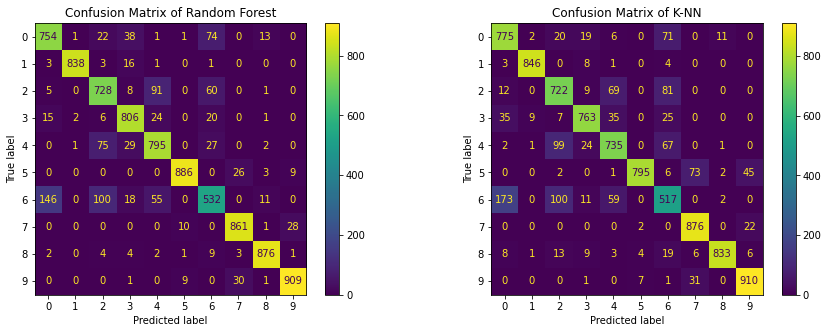

In [ ]:
# We create the confusion matrix of the Random Forest and K-NN models
cm_knn = confusion_matrix(Y_val, Y_val_pred_knn, labels=model_knn.classes_)
cm_rf = confusion_matrix(Y_val, Y_val_pred_rf, labels=model_rf.classes_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp_knn.plot(ax=axes[0])
axes[0].set_title("Confusion Matrix of Random Forest")

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp_rf.plot(ax=axes[1])
axes[1].set_title("Confusion Matrix of K-NN")

plt.show()

There are 146 examples of class 6 (i.e. Shirt) which are predicted as class 0 (i.e. T-shirt/top) in the Random Forest and 173 in the K-NN. \\
Let's see how they look like

Random Forest mispredicting examples:



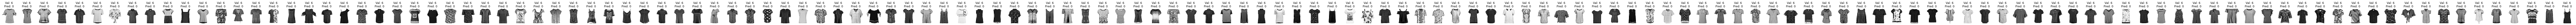

In [ ]:
print("Random Forest mispredicting examples:\n")
indices = np.all([ (Y_val==6), (Y_val_pred_rf==0) ], axis=0) 
_, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(200, 30))
for ax, image, label, pred_label in zip(axes, X_val[indices], Y_val[indices], Y_val_pred_rf[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Val: %i\nPred: %i" % (label, pred_label))

K-NN mispredicting examples:



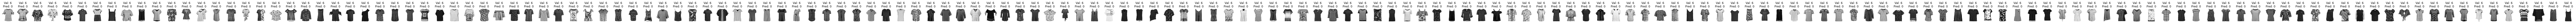

In [ ]:
print("K-NN mispredicting examples:\n")
indices = np.all([ (Y_val==6), (Y_val_pred_knn==0) ], axis=0) 
_, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(200, 30))
for ax, image, label, pred_label in zip(axes, X_val[indices], Y_val[indices], Y_val_pred_knn[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Val: %i\nPred: %i" % (label, pred_label))

Let's see also the confusion matrix of our best model

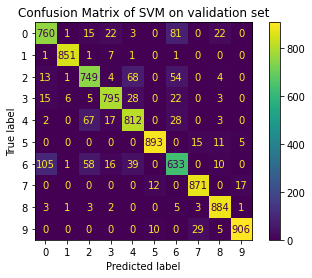

In [ ]:
cm_svm = confusion_matrix(Y_val, Y_val_pred_svm, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp.plot()
plt.title("Confusion Matrix of SVM on validation set")
plt.show()

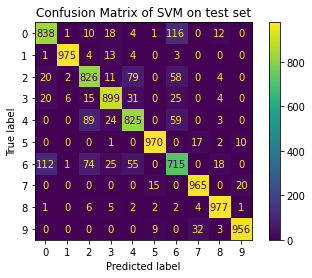

In [ ]:
cm_svm_test = confusion_matrix(Y_test, Y_test_pred_svm, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_test, display_labels=model_svm.classes_)
disp.plot()
plt.title("Confusion Matrix of SVM on test set")
plt.show()